# Run Topas from Jupyter
* Last update: 2019/02/08
* Created by Susanne Linn Skjærvø
--------------------------------------------------------------------------------------------------------------------------------
This notebook has been specifically made and edited for solving the $\textit{in situ}$ PXRD group exercise in TMT4301 Materials Characterization during the fall semester of 2019.  


NB: It should be noted that there is a difference between version 2.x and 3.x of Python in how the Topas output code is rendered. While version 2 will output ascii, version 3 will give you bytes. The current script should work for both, but if you are having problems write 'line' instead of 'line.decode('ascii')' in the last cell.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import time as t
import pylab as pl
from IPython import display
import os, subprocess, re, shutil

## Directories and files

#### User defined

In [2]:
Inp_file='refinement.inp'                                                  # name of input file
ext = 'xye'                                                                # datafile extension
directory1=os.getcwd()+'/'                                                     # defines the directory of the notebook as the working space
directory3=directory1+'/Output_Topas/'                                            # folder for output files

In [3]:
directory2=directory1+'Diffractograms/'                                    # folder of datafiles

if not os.path.exists(os.path.dirname(directory3)):
    os.makedirs(os.path.dirname(directory3))                               # make directory for output

## Process parameters

#### User defined

In [6]:
plotfig = 1                       # 1: graphical output (makes process slower), 0: text output
printall = 0                      # 1: print full refinement output, 0: print only most essential

start = 0                        # Define the filenumbers you want to refine here
end = 251

keywords=['DATASET', 'IN_FILE']   # keywords you want to replace in your .inp file, make sure pattern_str and replace_str has equally many arguments

In [7]:
all_files = directory2
all_data=[]
for filename in os.listdir(all_files):
    if filename.endswith(".%s"%(ext)): 
        all_data+=[all_files+filename]
        continue
    else:
        continue
all_data.sort()
print("Number of datafiles files found: %s"%len(all_data))
all_data=all_data[start:end]
print("Refining this many files: %s"%len(all_data))
#print(all_data)

Number of datafiles files found: 251
Refining this many files: 251


## Run Topas

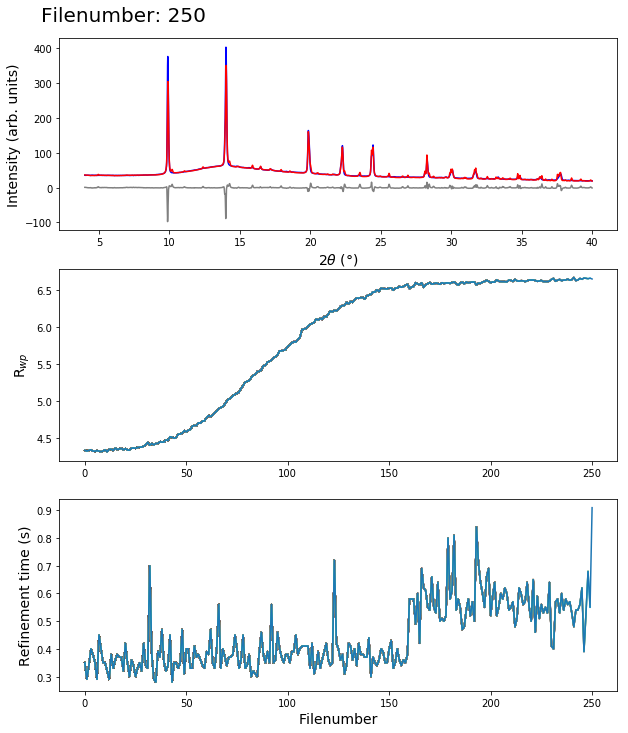

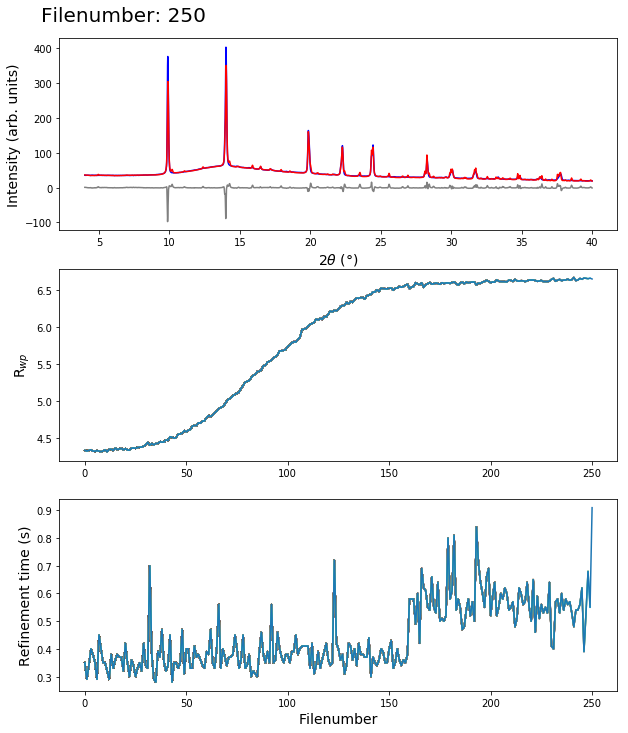

In [8]:
if plotfig == 1:
    fig=plt.figure(figsize=(10,12))
if plotfig == 1:
    printall == 0
Rwp=[]
time=[]
no =[]
count=1
for file in all_data:
    Base=os.path.splitext(os.path.basename(file))[0]                 # filenames of the datafiles without the extension
    temp_inp=directory3+Base+os.path.splitext(directory1+Inp_file)[1]    # temporary variable making individual inputfiles for every datafile
    shutil.copy(directory1+Inp_file,temp_inp)                            # copies the .inpfile in directory1 to directory2 and gives it the same name as the datafile 
    if plotfig !=1:
        print('   '+Base+'.inp')
    pattern_str=keywords                                   
    replace_str=[Base, directory2+Base]                                  # this is what you want to replace the keywords with (make sure patter_str and replace_str has the same amounts of arguments)
    for i,word in enumerate(pattern_str):                                # this loop replaces all the keywords you have set
        with open(temp_inp) as f:
            s = f.read()
        
        with open(temp_inp,'w') as f:
            s = s.replace(pattern_str[i],replace_str[i])
            f.write(s)
            
    cmd = 'C:/TOPAS5/tc %s' %(temp_inp)                                  # setting inputparameter for command prompt
   

    process = subprocess.Popen(cmd,stdout=subprocess.PIPE)               # launching Topas from the command prompt
    line_save=[]
    for line in process.stdout:                                          # retrieves certain parts of the refinement output
        if plotfig !=1 and printall == 1:
            print(line.decode('ascii'))                        
        if re.search(b'seconds',line):
            if plotfig != 1 and printall !=1:
                print('   '+' '+line_save.decode('ascii'))
            else:
                Rwp.append(float(line_save.decode('ascii')[24:33]))
                time.append(float(line_save.decode('ascii')[12:17]))
                try:
                    no.append(int(os.path.splitext(os.path.basename(file))[0][-4:]))
                except: 
                    no.append(count)
                    count=count+1
        line_save=line
    

    if plotfig == 1:                                                     # plots the retrieved data from the refinement output        
        refinement=np.loadtxt(directory2+Base+'.txt')   
        plt.subplot(311)
        plt.cla()
        plt.figtext(0.1,0.9, 'Filenumber: %s'%(no[-1]), fontsize=20, backgroundcolor='w')
        plt.xlabel(r'2$\theta$ ($\degree$)', fontsize=14)
        plt.ylabel('Intensity (arb. units)', fontsize=14)
        pl.plot(refinement[:,0], refinement[:,1], color='b')
        pl.plot(refinement[:,0], refinement[:,2], color='r')
        pl.plot(refinement[:,0], refinement[:,2]-refinement[:,1], color='grey')
        display.clear_output(wait=True)
        display.display(pl.gcf())
                
        plt.subplot(312)            
        plt.ylabel('R$_{wp}$', fontsize=14)
        pl.plot(no, Rwp)
        display.clear_output(wait=True)
        display.display(pl.gcf())
        
        plt.subplot(313)  
        plt.xlabel('Filenumber', fontsize=14)
        plt.ylabel('Refinement time (s)', fontsize=14)
        pl.plot(no, time)
        display.clear_output(wait=True)
        display.display(pl.gcf()) 